In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('/home/plokmit/csv/forest_dataset.csv')


In [4]:
y = data['54']
X = data.drop(columns= '54')


In [5]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25)
X_valid

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
6716,3268,105,20,175,49,2550,249,212,82,2724,...,0,0,0,0,0,0,0,0,0,0
3167,2903,81,23,228,69,5600,244,192,65,4457,...,0,0,0,0,0,0,0,0,0,0
8385,3002,352,7,323,21,1980,208,228,158,1060,...,0,1,0,0,0,0,0,0,0,0
6086,3171,335,9,376,70,4085,200,228,167,1008,...,0,0,0,0,0,0,0,0,0,0
5389,2354,311,24,295,107,713,148,215,204,384,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8435,2910,67,15,30,-11,3466,234,209,103,2735,...,0,0,0,0,0,0,0,0,0,0
9234,3175,32,4,376,102,4805,219,230,147,1622,...,0,0,0,0,0,0,0,0,0,0
6900,3235,176,15,150,17,2970,226,247,149,2341,...,0,0,0,0,0,0,0,0,0,0
2530,3390,302,17,895,154,1092,169,229,200,2060,...,0,1,0,0,0,0,0,0,0,0


In [6]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
result = knn.predict(X_valid.values)
accuracy_score(result, y_valid)

/home/plokmit/anaconda3/envs/myenvconda/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.7248

In [7]:
import numpy as np
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
params = {
    'n_neighbors': np.arange(1, 5), # также можно указать обычный массив, [1, 2, 3, 4]
    'metric': ['euclidean', 'manhattan'],
}

  
# defining parameter range
grid = GridSearchCV(knn, params, cv=5, scoring='accuracy', n_jobs=-1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

/home/plokmit/anaconda3/envs/myenvconda/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/plokmit/anaconda3/envs/myenvconda/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/plokmit/anaconda3/envs/myenvconda/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/plokmit/anaconda3/envs/myenvconda/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^

/home/plokmit/anaconda3/envs/myenvconda/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/plokmit/anaconda3/envs/myenvconda/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/plokmit/anaconda3/envs/myenvconda/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/plokmit/anaconda3/envs/myenvconda/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^

In [8]:
print(grid_search.best_params_)

{'metric': 'euclidean', 'n_neighbors': 1}


In [9]:
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : nan%


In [30]:

optimal_clf = KNeighborsClassifier(n_neighbors=4)
optimal_clf.fit(X_train.values, y_train.values)
pred_prob = optimal_clf.predict_proba(X_valid.values)
pred_prob

array([[0.5 , 0.  , 0.  , ..., 0.  , 0.  , 0.5 ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.25, 0.75, 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.5 , 0.  , 0.  , ..., 0.  , 0.  , 0.5 ],
       [0.75, 0.  , 0.  , ..., 0.  , 0.  , 0.25],
       [0.  , 0.75, 0.25, ..., 0.  , 0.  , 0.  ]])

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

unique, freq = np.unique(y_valid, return_counts=True)
freq = list(map(lambda x: x / len(y_valid),freq))

pred_freq = pred_prob.mean(axis=0)
pred_freq

array([0.3759, 0.4904, 0.0571, 0.0061, 0.0158, 0.0289, 0.0258])

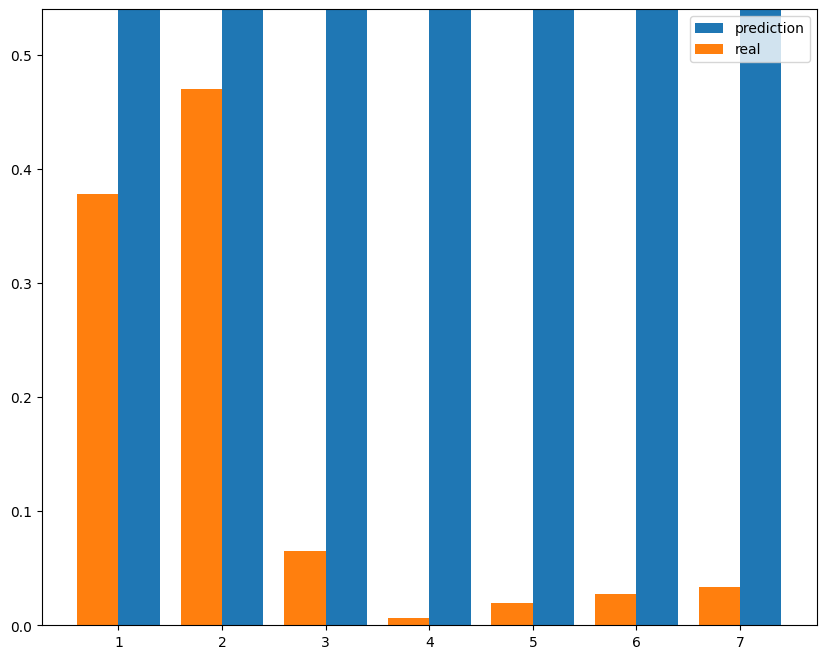

In [25]:
plt.figure(figsize=(10, 8))
plt.bar(range(1, 8), pred_freq, width=0.4, align="edge", label='prediction')
plt.bar(range(1, 8), freq, width=-0.4, align="edge", label='real')
plt.ylim(0, 0.54)
plt.legend()
plt.show()